In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Telco.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df["sex"]=df.gender

In [5]:
df.groupby(['sex','gender'])['customerID'].count()/df.groupby(['sex'])['customerID'].count()

sex     gender
Female  Female    1.0
Male    Male      1.0
Name: customerID, dtype: float64

In [6]:
df.groupby(['Partner','Dependents'])['customerID'].count()/df.groupby(['Partner'])['customerID'].count()

Partner  Dependents
No       No            0.900851
         Yes           0.099149
Yes      No            0.485891
         Yes           0.514109
Name: customerID, dtype: float64

In [7]:
from sklearn.metrics import confusion_matrix
ct=confusion_matrix(df['Partner'],df['Dependents'])
ct

array([[3280,  361],
       [1653, 1749]], dtype=int64)

In [8]:
from scipy.stats import chi2_contingency
chi2_contingency(ct,correction=False)

(1443.2221000243062, 0.0, 1, array([[2550.19920488, 1090.80079512],
        [2382.80079512, 1019.19920488]]))

In [9]:
from sklearn.metrics import confusion_matrix
ct=confusion_matrix(df['gender'],df['sex'])
chi2_contingency(ct,correction=False)

(7043.000000000001, 0.0, 1, array([[1727.40934261, 1760.59065739],
        [1760.59065739, 1794.40934261]]))

In [10]:
from sklearn.metrics import confusion_matrix
ct=confusion_matrix(df['Partner'],df['Churn'])
print(ct)
chi2_contingency(ct,correction=False)

[[2441 1200]
 [2733  669]]


(159.41452843242658,
 1.5190366200997138e-36,
 1,
 array([[2674.78830044,  966.21169956],
        [2499.21169956,  902.78830044]]))

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
sex                  object
dtype: object

In [12]:
def str_float_tc(x):
    try:
        return float(x)
    except:
        return 0.0
df.TotalCharges=df.TotalCharges.map(lambda x: str_float_tc(x))

In [13]:
df[df.PhoneService=="No"]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,sex
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,Female
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,Male
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes,Male
62,0526-SXDJP,Male,0,Yes,No,72,No,No phone service,DSL,Yes,...,No,No,No,Two year,No,Bank transfer (automatic),42.10,2962.00,No,Male
81,8108-UXRQN,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Yes,Yes,Month-to-month,No,Electronic check,50.55,565.35,No,Female
89,3016-KSVCP,Male,0,Yes,No,29,No,No phone service,DSL,No,...,No,Yes,No,Month-to-month,No,Mailed check,33.75,1009.25,No,Male
103,5386-THSLQ,Female,1,Yes,No,66,No,No phone service,DSL,No,...,No,Yes,No,One year,No,Bank transfer (automatic),45.55,3027.25,No,Female
105,6180-YBIQI,Male,0,No,No,5,No,No phone service,DSL,No,...,No,No,No,Month-to-month,No,Mailed check,24.30,100.20,No,Male


In [14]:
df['ten_chr']=df.tenure*df.MonthlyCharges

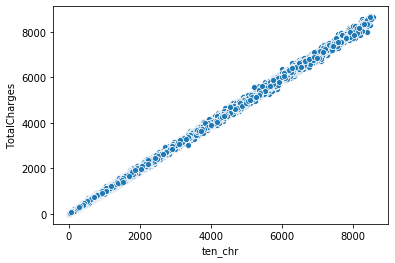

In [15]:
sns.scatterplot(df.ten_chr,df.TotalCharges)

In [16]:
df[df.PhoneService=="Yes"]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,sex,ten_chr
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Male,1936.30
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,107.70
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,141.40
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Female,797.20
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,Male,1960.20
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Female,2934.40
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,Male,3481.30
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No,Male,649.35
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No,Male,303.20
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No,Male,5820.30


In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'sex',
       'ten_chr'],
      dtype='object')

In [18]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [19]:
def contract_ordinal(x):
    if x=='Month-to-month':
        return 1.0
    elif x=='One year':
        return 12.0
    else:
        return 24.0
    
def str_float_tc(x):
    try:
        return float(x)
    except:
        return 0.0

def data_cleaning(data):
    data=data.copy()
    y=data.Churn.map(lambda x: 1 if x=="Yes" else 0)
    data['gender']=data['gender'].map(lambda x: 1 if x=="Male" else 0)
    data['Partner']=data['Partner'].map(lambda x: 1 if x=="Yes" else 0)
    data['Dependents']=data['Dependents'].map(lambda x: 1 if x=="Yes" else 0)
    data.PhoneService=data.PhoneService.map(lambda x: 1 if x=="Yes" else 0)
    data=data.join(pd.get_dummies(df.MultipleLines),rsuffix="MultpleLines")
    data=data.join(pd.get_dummies(df.InternetService),rsuffix="InternetService")
    data=data.join(pd.get_dummies(df.OnlineSecurity),rsuffix="OnlineSecurity")
    data=data.join(pd.get_dummies(df.OnlineBackup),rsuffix="OnlineBackup")
    data=data.join(pd.get_dummies(df.DeviceProtection),rsuffix="DeviceProtection")
    data=data.join(pd.get_dummies(df.TechSupport),rsuffix="TechSupport")
    data=data.join(pd.get_dummies(df.StreamingTV),rsuffix="StreamingTV")
    data=data.join(pd.get_dummies(df.StreamingMovies),rsuffix="StreamingMovies")
    data['Contract']=data.Contract.map(lambda x: contract_ordinal(x))
    data['PaperlessBilling']=data['PaperlessBilling'].map(lambda x: 1 if x=="Yes" else 0)
    data=data.join(pd.get_dummies(df.PaymentMethod),rsuffix="PaymentMethod")
    data.TotalCharges=data.TotalCharges.map(lambda x: str_float_tc(x))
    data=data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService',
        'Contract', 'PaperlessBilling',
       'MonthlyCharges',  'No', 'No phone service', 'Yes', 'DSL', 'Fiber optic',
       'NoInternetService', 'NoOnlineSecurity', 'No internet service',
       'YesOnlineSecurity', 'NoOnlineBackup',
       'No internet serviceOnlineBackup', 'YesOnlineBackup',
       'NoDeviceProtection', 'No internet serviceDeviceProtection',
       'YesDeviceProtection', 'NoTechSupport',
       'No internet serviceTechSupport', 'YesTechSupport', 'NoStreamingTV',
       'No internet serviceStreamingTV', 'YesStreamingTV', 'NoStreamingMovies',
       'No internet serviceStreamingMovies', 'YesStreamingMovies',
       'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check']]
    return data,y

X,y=data_cleaning(df)


In [20]:
X.shape

(7043, 37)

# Entropy

In [21]:
-0.8*np.log2(0.8)-0.2*np.log2(0.2)

0.7219280948873623

In [22]:
def entropy(p):
    if p==0 or p==1:
        return 0
    return -p*np.log2(p)-(1-p)*np.log2(1-p)

In [23]:
entropy(.8)

0.7219280948873623

In [24]:
winning=np.arange(0,101)/100

In [25]:
ent=[]
for p in winning:
    ent.append(entropy(p))

In [26]:
s=pd.Series(ent,index=winning)

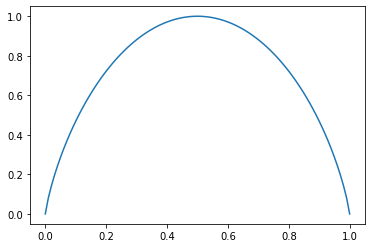

In [27]:
plt.plot(s)

In [28]:
#probability of playing
p=9/14
entropy(p)

0.9402859586706311

In [29]:
#if sunny
entropy(2/5)

0.9709505944546686

In [30]:
#if overcast
entropy(4/4)

0

In [31]:
#if rainy
entropy(3/5)

0.9709505944546686

In [32]:
#weighted entropy
5/14*entropy(2/5)+4/14*entropy(4/4)+5/14*entropy(3/5)

0.6935361388961918

In [33]:
#decrease in entropy or Information Gain
entropy(9/14)-(5/14*entropy(2/5)+4/14*entropy(4/4)+5/14*entropy(3/5))

0.24674981977443933

In [34]:
#IG for temp
entropy(9/14)-(4/14*entropy(2/4)+6/14*entropy(4/6)+4/14*entropy(3/4))

0.02922256565895487

In [35]:
#IG for humidity
entropy(9/14)-(7/14*entropy(3/7)+7/14*entropy(6/7))

0.15183550136234159

In [36]:
#IG for windy
entropy(9/14)-(8/14*entropy(6/8)+6/14*entropy(3/6))

0.04812703040826949

# Decision Tree

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=22)

In [38]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)
print("training accuracy",dtc.score(X_train,y_train))
print("testing accuracy",dtc.score(X_test,y_test))

training accuracy 0.9977281332828474
testing accuracy 0.7189097103918228


In [39]:
export_graphviz(decision_tree=dtc,out_file='telco_tree.dot',feature_names=X.columns,\
               filled=True, rounded=True,special_characters=True)

In [40]:
# generate plot
#!pip install pygraphviz pydotplus
#add graphviz bin folder to path variable and restart system
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc,feature_names=X.columns, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


ModuleNotFoundError: No module named 'pydotplus'

In [41]:
for depth in range(1,25):
    dtc=DecisionTreeClassifier(criterion="entropy",max_depth=depth)
    dtc.fit(X_train,y_train)
    print(depth,"training accuracy",dtc.score(X_train,y_train))
    print(depth,"testing accuracy",dtc.score(X_test,y_test))

1 training accuracy 0.7385460053010223
1 testing accuracy 0.7228847245883021
2 training accuracy 0.7459295721317682
2 testing accuracy 0.7319704713231119
3 training accuracy 0.7836046951912155
3 testing accuracy 0.7575241340147644
4 training accuracy 0.7836046951912155
4 testing accuracy 0.7575241340147644
5 training accuracy 0.8055660734570238
5 testing accuracy 0.7791027825099376
6 training accuracy 0.8114350624763347
6 testing accuracy 0.7756956274843839
7 training accuracy 0.8220371071563801
7 testing accuracy 0.7717206132879046
8 training accuracy 0.8358576296857251
8 testing accuracy 0.7705848949460534
9 training accuracy 0.8489208633093526
9 testing accuracy 0.7620670073821693
10 training accuracy 0.8667171525937145
10 testing accuracy 0.7518455423055083
11 training accuracy 0.8854600530102233
11 testing accuracy 0.7421919363997729
12 training accuracy 0.9023097311624385
12 testing accuracy 0.7433276547416241
13 training accuracy 0.9206739871260886
13 testing accuracy 0.74219193

In [42]:
y_train.value_counts()

0    3901
1    1381
Name: Churn, dtype: int64

In [43]:
dtc=DecisionTreeClassifier(criterion="entropy",max_depth=5)
dtc.fit(X_train,y_train)
print("training accuracy",dtc.score(X_train,y_train))
print("testing accuracy",dtc.score(X_test,y_test))

training accuracy 0.8055660734570238
testing accuracy 0.7791027825099376


In [44]:
y_hat=dtc.predict(X_test)

In [45]:
#dtc.predict_proba(X_test)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_hat,y_test))

              precision    recall  f1-score   support

           0       0.90      0.81      0.86      1412
           1       0.46      0.64      0.54       349

    accuracy                           0.78      1761
   macro avg       0.68      0.73      0.70      1761
weighted avg       0.81      0.78      0.79      1761



In [47]:
highest=0
for depth in range(3,15):
    for ss in range(2,20):
        for msl in range(2,12):
            dtc=DecisionTreeClassifier(criterion="entropy",\
                                       max_depth=depth,\
                                       min_samples_split=ss,
                                      min_samples_leaf=msl)
            dtc.fit(X_train,y_train)
            #if dtc.score(X_test,y_test)>highest:
                #highest=dtc.score(X_test,y_test)
            print(depth,ss,msl,"training accuracy",dtc.score(X_train,y_train))
            print(depth,ss,msl,"testing accuracy",dtc.score(X_test,y_test))


3 2 2 training accuracy 0.7836046951912155
3 2 2 testing accuracy 0.7575241340147644
3 2 3 training accuracy 0.7836046951912155
3 2 3 testing accuracy 0.7575241340147644
3 2 4 training accuracy 0.7836046951912155
3 2 4 testing accuracy 0.7575241340147644
3 2 5 training accuracy 0.7836046951912155
3 2 5 testing accuracy 0.7575241340147644
3 2 6 training accuracy 0.7836046951912155
3 2 6 testing accuracy 0.7575241340147644
3 2 7 training accuracy 0.7836046951912155
3 2 7 testing accuracy 0.7575241340147644
3 2 8 training accuracy 0.7836046951912155
3 2 8 testing accuracy 0.7575241340147644
3 2 9 training accuracy 0.7836046951912155
3 2 9 testing accuracy 0.7575241340147644
3 2 10 training accuracy 0.7836046951912155
3 2 10 testing accuracy 0.7575241340147644
3 2 11 training accuracy 0.7836046951912155
3 2 11 testing accuracy 0.7575241340147644
3 3 2 training accuracy 0.7836046951912155
3 3 2 testing accuracy 0.7575241340147644
3 3 3 training accuracy 0.7836046951912155
3 3 3 testing accu

3 11 8 testing accuracy 0.7575241340147644
3 11 9 training accuracy 0.7836046951912155
3 11 9 testing accuracy 0.7575241340147644
3 11 10 training accuracy 0.7836046951912155
3 11 10 testing accuracy 0.7575241340147644
3 11 11 training accuracy 0.7836046951912155
3 11 11 testing accuracy 0.7575241340147644
3 12 2 training accuracy 0.7836046951912155
3 12 2 testing accuracy 0.7575241340147644
3 12 3 training accuracy 0.7836046951912155
3 12 3 testing accuracy 0.7575241340147644
3 12 4 training accuracy 0.7836046951912155
3 12 4 testing accuracy 0.7575241340147644
3 12 5 training accuracy 0.7836046951912155
3 12 5 testing accuracy 0.7575241340147644
3 12 6 training accuracy 0.7836046951912155
3 12 6 testing accuracy 0.7575241340147644
3 12 7 training accuracy 0.7836046951912155
3 12 7 testing accuracy 0.7575241340147644
3 12 8 training accuracy 0.7836046951912155
3 12 8 testing accuracy 0.7575241340147644
3 12 9 training accuracy 0.7836046951912155
3 12 9 testing accuracy 0.7575241340147

4 3 4 testing accuracy 0.7575241340147644
4 3 5 training accuracy 0.7836046951912155
4 3 5 testing accuracy 0.7575241340147644
4 3 6 training accuracy 0.7836046951912155
4 3 6 testing accuracy 0.7575241340147644
4 3 7 training accuracy 0.7836046951912155
4 3 7 testing accuracy 0.7575241340147644
4 3 8 training accuracy 0.7836046951912155
4 3 8 testing accuracy 0.7575241340147644
4 3 9 training accuracy 0.7836046951912155
4 3 9 testing accuracy 0.7575241340147644
4 3 10 training accuracy 0.7836046951912155
4 3 10 testing accuracy 0.7575241340147644
4 3 11 training accuracy 0.7836046951912155
4 3 11 testing accuracy 0.7575241340147644
4 4 2 training accuracy 0.7836046951912155
4 4 2 testing accuracy 0.7575241340147644
4 4 3 training accuracy 0.7836046951912155
4 4 3 testing accuracy 0.7575241340147644
4 4 4 training accuracy 0.7836046951912155
4 4 4 testing accuracy 0.7575241340147644
4 4 5 training accuracy 0.7836046951912155
4 4 5 testing accuracy 0.7575241340147644
4 4 6 training accu

4 13 2 training accuracy 0.7836046951912155
4 13 2 testing accuracy 0.7575241340147644
4 13 3 training accuracy 0.7836046951912155
4 13 3 testing accuracy 0.7575241340147644
4 13 4 training accuracy 0.7836046951912155
4 13 4 testing accuracy 0.7575241340147644
4 13 5 training accuracy 0.7836046951912155
4 13 5 testing accuracy 0.7575241340147644
4 13 6 training accuracy 0.7836046951912155
4 13 6 testing accuracy 0.7575241340147644
4 13 7 training accuracy 0.7836046951912155
4 13 7 testing accuracy 0.7575241340147644
4 13 8 training accuracy 0.7836046951912155
4 13 8 testing accuracy 0.7575241340147644
4 13 9 training accuracy 0.7836046951912155
4 13 9 testing accuracy 0.7575241340147644
4 13 10 training accuracy 0.7836046951912155
4 13 10 testing accuracy 0.7575241340147644
4 13 11 training accuracy 0.7836046951912155
4 13 11 testing accuracy 0.7575241340147644
4 14 2 training accuracy 0.7836046951912155
4 14 2 testing accuracy 0.7575241340147644
4 14 3 training accuracy 0.783604695191

5 4 7 training accuracy 0.8051874290041651
5 4 7 testing accuracy 0.7796706416808632
5 4 8 training accuracy 0.8051874290041651
5 4 8 testing accuracy 0.7796706416808632
5 4 9 training accuracy 0.8051874290041651
5 4 9 testing accuracy 0.7796706416808632
5 4 10 training accuracy 0.8051874290041651
5 4 10 testing accuracy 0.7796706416808632
5 4 11 training accuracy 0.8051874290041651
5 4 11 testing accuracy 0.7796706416808632
5 5 2 training accuracy 0.8055660734570238
5 5 2 testing accuracy 0.7791027825099376
5 5 3 training accuracy 0.8051874290041651
5 5 3 testing accuracy 0.7796706416808632
5 5 4 training accuracy 0.8051874290041651
5 5 4 testing accuracy 0.7796706416808632
5 5 5 training accuracy 0.8051874290041651
5 5 5 testing accuracy 0.7796706416808632
5 5 6 training accuracy 0.8051874290041651
5 5 6 testing accuracy 0.7796706416808632
5 5 7 training accuracy 0.8051874290041651
5 5 7 testing accuracy 0.7796706416808632
5 5 8 training accuracy 0.8051874290041651
5 5 8 testing accu

5 14 4 training accuracy 0.8051874290041651
5 14 4 testing accuracy 0.7796706416808632
5 14 5 training accuracy 0.8051874290041651
5 14 5 testing accuracy 0.7796706416808632
5 14 6 training accuracy 0.8051874290041651
5 14 6 testing accuracy 0.7796706416808632
5 14 7 training accuracy 0.8051874290041651
5 14 7 testing accuracy 0.7796706416808632
5 14 8 training accuracy 0.8051874290041651
5 14 8 testing accuracy 0.7796706416808632
5 14 9 training accuracy 0.8051874290041651
5 14 9 testing accuracy 0.7796706416808632
5 14 10 training accuracy 0.8051874290041651
5 14 10 testing accuracy 0.7796706416808632
5 14 11 training accuracy 0.8051874290041651
5 14 11 testing accuracy 0.7796706416808632
5 15 2 training accuracy 0.8055660734570238
5 15 2 testing accuracy 0.7791027825099376
5 15 3 training accuracy 0.8051874290041651
5 15 3 testing accuracy 0.7796706416808632
5 15 4 training accuracy 0.8051874290041651
5 15 4 testing accuracy 0.7796706416808632
5 15 5 training accuracy 0.805187429004

6 5 10 training accuracy 0.8102991291177585
6 5 10 testing accuracy 0.7802385008517888
6 5 11 training accuracy 0.8102991291177585
6 5 11 testing accuracy 0.7802385008517888
6 6 2 training accuracy 0.8112457402499054
6 6 2 testing accuracy 0.7762634866553095
6 6 3 training accuracy 0.8104884513441878
6 6 3 testing accuracy 0.7779670641680864
6 6 4 training accuracy 0.8108670957970465
6 6 4 testing accuracy 0.7779670641680864
6 6 5 training accuracy 0.8108670957970465
6 6 5 testing accuracy 0.7779670641680864
6 6 6 training accuracy 0.8108670957970465
6 6 6 testing accuracy 0.7779670641680864
6 6 7 training accuracy 0.8108670957970465
6 6 7 testing accuracy 0.7779670641680864
6 6 8 training accuracy 0.8108670957970465
6 6 8 testing accuracy 0.7779670641680864
6 6 9 training accuracy 0.8108670957970465
6 6 9 testing accuracy 0.7779670641680864
6 6 10 training accuracy 0.8102991291177585
6 6 10 testing accuracy 0.7802385008517888
6 6 11 training accuracy 0.8102991291177585
6 6 11 testing 

6 15 5 testing accuracy 0.7779670641680864
6 15 6 training accuracy 0.8108670957970465
6 15 6 testing accuracy 0.7779670641680864
6 15 7 training accuracy 0.8108670957970465
6 15 7 testing accuracy 0.7779670641680864
6 15 8 training accuracy 0.8108670957970465
6 15 8 testing accuracy 0.7779670641680864
6 15 9 training accuracy 0.8108670957970465
6 15 9 testing accuracy 0.7779670641680864
6 15 10 training accuracy 0.8102991291177585
6 15 10 testing accuracy 0.7802385008517888
6 15 11 training accuracy 0.8102991291177585
6 15 11 testing accuracy 0.7802385008517888
6 16 2 training accuracy 0.8112457402499054
6 16 2 testing accuracy 0.7762634866553095
6 16 3 training accuracy 0.8104884513441878
6 16 3 testing accuracy 0.7779670641680864
6 16 4 training accuracy 0.8108670957970465
6 16 4 testing accuracy 0.7779670641680864
6 16 5 training accuracy 0.8108670957970465
6 16 5 testing accuracy 0.7779670641680864
6 16 6 training accuracy 0.8108670957970465
6 16 6 testing accuracy 0.7779670641680

7 6 11 testing accuracy 0.7847813742191937
7 7 2 training accuracy 0.8207118515713745
7 7 2 testing accuracy 0.7768313458262351
7 7 3 training accuracy 0.8193865959863688
7 7 3 testing accuracy 0.778534923339012
7 7 4 training accuracy 0.8188186293070806
7 7 4 testing accuracy 0.778534923339012
7 7 5 training accuracy 0.8186293070806513
7 7 5 testing accuracy 0.7802385008517888
7 7 6 training accuracy 0.8178720181749337
7 7 6 testing accuracy 0.7796706416808632
7 7 7 training accuracy 0.8171147292692162
7 7 7 testing accuracy 0.7808063600227144
7 7 8 training accuracy 0.8167360848163574
7 7 8 testing accuracy 0.7830777967064169
7 7 9 training accuracy 0.8169254070427868
7 7 9 testing accuracy 0.7847813742191937
7 7 10 training accuracy 0.8167360848163574
7 7 10 testing accuracy 0.7847813742191937
7 7 11 training accuracy 0.8167360848163574
7 7 11 testing accuracy 0.7847813742191937
7 8 2 training accuracy 0.8201438848920863
7 8 2 testing accuracy 0.7773992049971608
7 8 3 training accur

7 16 6 testing accuracy 0.78137421919364
7 16 7 training accuracy 0.8171147292692162
7 16 7 testing accuracy 0.7808063600227144
7 16 8 training accuracy 0.8167360848163574
7 16 8 testing accuracy 0.7825099375354913
7 16 9 training accuracy 0.8169254070427868
7 16 9 testing accuracy 0.7847813742191937
7 16 10 training accuracy 0.8167360848163574
7 16 10 testing accuracy 0.7847813742191937
7 16 11 training accuracy 0.8167360848163574
7 16 11 testing accuracy 0.7847813742191937
7 17 2 training accuracy 0.8186293070806513
7 17 2 testing accuracy 0.7796706416808632
7 17 3 training accuracy 0.8176826959485044
7 17 3 testing accuracy 0.7825099375354913
7 17 4 training accuracy 0.8176826959485044
7 17 4 testing accuracy 0.7808063600227144
7 17 5 training accuracy 0.817493373722075
7 17 5 testing accuracy 0.7825099375354913
7 17 6 training accuracy 0.8171147292692162
7 17 6 testing accuracy 0.78137421919364
7 17 7 training accuracy 0.8171147292692162
7 17 7 testing accuracy 0.7808063600227144
7

8 8 2 training accuracy 0.8326391518364256
8 8 2 testing accuracy 0.7779670641680864
8 8 3 training accuracy 0.8326391518364256
8 8 3 testing accuracy 0.7802385008517888
8 8 4 training accuracy 0.8315032184778492
8 8 4 testing accuracy 0.7819420783645656
8 8 5 training accuracy 0.8322605073835668
8 8 5 testing accuracy 0.7773992049971608
8 8 6 training accuracy 0.8315032184778492
8 8 6 testing accuracy 0.7756956274843839
8 8 7 training accuracy 0.8301779628928436
8 8 7 testing accuracy 0.7768313458262351
8 8 8 training accuracy 0.8290420295342673
8 8 8 testing accuracy 0.7791027825099376
8 8 9 training accuracy 0.8286633850814086
8 8 9 testing accuracy 0.7836456558773425
8 8 10 training accuracy 0.8265808405906854
8 8 10 testing accuracy 0.7876206700738216
8 8 11 training accuracy 0.8260128739113972
8 8 11 testing accuracy 0.7864849517319704
8 9 2 training accuracy 0.8322605073835668
8 9 2 testing accuracy 0.7762634866553095
8 9 3 training accuracy 0.8322605073835668
8 9 3 testing accu

8 17 8 training accuracy 0.8290420295342673
8 17 8 testing accuracy 0.7791027825099376
8 17 9 training accuracy 0.8286633850814086
8 17 9 testing accuracy 0.7836456558773425
8 17 10 training accuracy 0.8265808405906854
8 17 10 testing accuracy 0.7876206700738216
8 17 11 training accuracy 0.8260128739113972
8 17 11 testing accuracy 0.7864849517319704
8 18 2 training accuracy 0.8292313517606967
8 18 2 testing accuracy 0.7779670641680864
8 18 3 training accuracy 0.8290420295342673
8 18 3 testing accuracy 0.7796706416808632
8 18 4 training accuracy 0.8292313517606967
8 18 4 testing accuracy 0.7796706416808632
8 18 5 training accuracy 0.830367285119273
8 18 5 testing accuracy 0.778534923339012
8 18 6 training accuracy 0.830367285119273
8 18 6 testing accuracy 0.7773992049971608
8 18 7 training accuracy 0.8297993184399849
8 18 7 testing accuracy 0.7773992049971608
8 18 8 training accuracy 0.8290420295342673
8 18 8 testing accuracy 0.7791027825099376
8 18 9 training accuracy 0.828663385081408

9 9 5 training accuracy 0.8371828852707308
9 9 5 testing accuracy 0.7705848949460534
9 9 6 training accuracy 0.8347216963271488
9 9 6 testing accuracy 0.7734241908006815
9 9 7 training accuracy 0.8337750851950019
9 9 7 testing accuracy 0.7734241908006815
9 9 8 training accuracy 0.8320711851571374
9 9 8 testing accuracy 0.7762634866553095
9 9 9 training accuracy 0.8326391518364256
9 9 9 testing accuracy 0.7836456558773425
9 9 10 training accuracy 0.8318818629307081
9 9 10 testing accuracy 0.7887563884156729
9 9 11 training accuracy 0.8299886406664142
9 9 11 testing accuracy 0.7893242475865985
9 10 2 training accuracy 0.8404013631200303
9 10 2 testing accuracy 0.7694491766042022
9 10 3 training accuracy 0.8394547519878833
9 10 3 testing accuracy 0.7705848949460534
9 10 4 training accuracy 0.8383188186293071
9 10 4 testing accuracy 0.771152754116979
9 10 5 training accuracy 0.8371828852707308
9 10 5 testing accuracy 0.771152754116979
9 10 6 training accuracy 0.8347216963271488
9 10 6 test

9 18 10 training accuracy 0.8318818629307081
9 18 10 testing accuracy 0.787052810902896
9 18 11 training accuracy 0.8299886406664142
9 18 11 testing accuracy 0.7893242475865985
9 19 2 training accuracy 0.8349110185535782
9 19 2 testing accuracy 0.7722884724588303
9 19 3 training accuracy 0.8333964407421431
9 19 3 testing accuracy 0.7756956274843839
9 19 4 training accuracy 0.8330177962892844
9 19 4 testing accuracy 0.7773992049971608
9 19 5 training accuracy 0.832828474062855
9 19 5 testing accuracy 0.7773992049971608
9 19 6 training accuracy 0.8318818629307081
9 19 6 testing accuracy 0.7779670641680864
9 19 7 training accuracy 0.8318818629307081
9 19 7 testing accuracy 0.7773992049971608
9 19 8 training accuracy 0.8311245740249905
9 19 8 testing accuracy 0.7756956274843839
9 19 9 training accuracy 0.8324498296099963
9 19 9 testing accuracy 0.7836456558773425
9 19 10 training accuracy 0.8318818629307081
9 19 10 testing accuracy 0.7887563884156729
9 19 11 training accuracy 0.82998864066

10 10 5 training accuracy 0.8485422188564937
10 10 5 testing accuracy 0.7541169789892107
10 10 6 training accuracy 0.8451344187807649
10 10 6 testing accuracy 0.7563884156729132
10 10 7 training accuracy 0.8436198409693298
10 10 7 testing accuracy 0.7575241340147644
10 10 8 training accuracy 0.841726618705036
10 10 8 testing accuracy 0.7643384440658717
10 10 9 training accuracy 0.8404013631200303
10 10 9 testing accuracy 0.7751277683134583
10 10 10 training accuracy 0.8383188186293071
10 10 10 testing accuracy 0.7796706416808632
10 10 11 training accuracy 0.8364255963650132
10 10 11 testing accuracy 0.7836456558773425
10 11 2 training accuracy 0.8508140855736464
10 11 2 testing accuracy 0.7637705848949461
10 11 3 training accuracy 0.8485422188564937
10 11 3 testing accuracy 0.7620670073821693
10 11 4 training accuracy 0.8466489965921999
10 11 4 testing accuracy 0.7603634298693924
10 11 5 training accuracy 0.8472169632714881
10 11 5 testing accuracy 0.7563884156729132
10 11 6 training a

10 19 9 training accuracy 0.8400227186671715
10 19 9 testing accuracy 0.7728563316297559
10 19 10 training accuracy 0.8383188186293071
10 19 10 testing accuracy 0.78137421919364
10 19 11 training accuracy 0.8364255963650132
10 19 11 testing accuracy 0.7819420783645656
11 2 2 training accuracy 0.8746686861037486
11 2 2 testing accuracy 0.7552526973310619
11 2 3 training accuracy 0.8703142748958728
11 2 3 testing accuracy 0.7597955706984668
11 2 4 training accuracy 0.8608481635744036
11 2 4 testing accuracy 0.7637705848949461
11 2 5 training accuracy 0.857061719045816
11 2 5 testing accuracy 0.7552526973310619
11 2 6 training accuracy 0.8517606967057932
11 2 6 testing accuracy 0.7552526973310619
11 2 7 training accuracy 0.8492995077622113
11 2 7 testing accuracy 0.7620670073821693
11 2 8 training accuracy 0.8468383188186293
11 2 8 testing accuracy 0.7660420215786485
11 2 9 training accuracy 0.8475956077243468
11 2 9 testing accuracy 0.7734241908006815
11 2 10 training accuracy 0.84456645

11 11 3 testing accuracy 0.7592277115275412
11 11 4 training accuracy 0.8564937523665278
11 11 4 testing accuracy 0.760931289040318
11 11 5 training accuracy 0.8559257856872396
11 11 5 testing accuracy 0.760931289040318
11 11 6 training accuracy 0.8519500189322227
11 11 6 testing accuracy 0.7552526973310619
11 11 7 training accuracy 0.8492995077622113
11 11 7 testing accuracy 0.7614991482112436
11 11 8 training accuracy 0.8468383188186293
11 11 8 testing accuracy 0.7643384440658717
11 11 9 training accuracy 0.8475956077243468
11 11 9 testing accuracy 0.7751277683134583
11 11 10 training accuracy 0.8445664521014767
11 11 10 testing accuracy 0.7779670641680864
11 11 11 training accuracy 0.8421052631578947
11 11 11 testing accuracy 0.7762634866553095
11 12 2 training accuracy 0.8616054524801212
11 12 2 testing accuracy 0.7586598523566156
11 12 3 training accuracy 0.8593335857629686
11 12 3 testing accuracy 0.7597955706984668
11 12 4 training accuracy 0.8557364634608103
11 12 4 testing acc

12 2 6 training accuracy 0.8587656190836804
12 2 6 testing accuracy 0.7490062464508802
12 2 7 training accuracy 0.8566830745929572
12 2 7 testing accuracy 0.7541169789892107
12 2 8 training accuracy 0.8538432411965164
12 2 8 testing accuracy 0.7541169789892107
12 2 9 training accuracy 0.8523286633850814
12 2 9 testing accuracy 0.7666098807495741
12 2 10 training accuracy 0.848163574403635
12 2 10 testing accuracy 0.7768313458262351
12 2 11 training accuracy 0.8453237410071942
12 2 11 testing accuracy 0.7717206132879046
12 3 2 training accuracy 0.8871639530480878
12 3 2 testing accuracy 0.7529812606473595
12 3 3 training accuracy 0.8814842862552064
12 3 3 testing accuracy 0.7484383872799546
12 3 4 training accuracy 0.8720181749337372
12 3 4 testing accuracy 0.7501419647927314
12 3 5 training accuracy 0.8653918970087088
12 3 5 testing accuracy 0.7512776831345827
12 3 6 training accuracy 0.8589549413101099
12 3 6 testing accuracy 0.750709823963657
12 3 7 training accuracy 0.85668307459295

12 11 10 training accuracy 0.848163574403635
12 11 10 testing accuracy 0.7768313458262351
12 11 11 training accuracy 0.8453237410071942
12 11 11 testing accuracy 0.7717206132879046
12 12 2 training accuracy 0.8697463082165846
12 12 2 testing accuracy 0.7535491198182851
12 12 3 training accuracy 0.8661491859144264
12 12 3 testing accuracy 0.7529812606473595
12 12 4 training accuracy 0.8644452858765619
12 12 4 testing accuracy 0.7535491198182851
12 12 5 training accuracy 0.8625520636122681
12 12 5 testing accuracy 0.7535491198182851
12 12 6 training accuracy 0.8587656190836804
12 12 6 testing accuracy 0.7512776831345827
12 12 7 training accuracy 0.8566830745929572
12 12 7 testing accuracy 0.7558205565019875
12 12 8 training accuracy 0.8538432411965164
12 12 8 testing accuracy 0.7535491198182851
12 12 9 training accuracy 0.852139341158652
12 12 9 testing accuracy 0.7660420215786485
12 12 10 training accuracy 0.848163574403635
12 12 10 testing accuracy 0.7762634866553095
12 12 11 training 

13 3 4 training accuracy 0.88034835289663
13 3 4 testing accuracy 0.7495741056218058
13 3 5 training accuracy 0.8729647860658841
13 3 5 testing accuracy 0.7467348097671778
13 3 6 training accuracy 0.8648239303294206
13 3 6 testing accuracy 0.747870528109029
13 3 7 training accuracy 0.8610374858008331
13 3 7 testing accuracy 0.7552526973310619
13 3 8 training accuracy 0.8572510412722454
13 3 8 testing accuracy 0.7552526973310619
13 3 9 training accuracy 0.8538432411965164
13 3 9 testing accuracy 0.7603634298693924
13 3 10 training accuracy 0.84967815221507
13 3 10 testing accuracy 0.7739920499716071
13 3 11 training accuracy 0.8466489965921999
13 3 11 testing accuracy 0.7694491766042022
13 4 2 training accuracy 0.9000378644452859
13 4 2 testing accuracy 0.7541169789892107
13 4 3 training accuracy 0.8913290420295342
13 4 3 testing accuracy 0.7467348097671778
13 4 4 training accuracy 0.8801590306702006
13 4 4 testing accuracy 0.7495741056218058
13 4 5 training accuracy 0.872396819386596
1

13 12 9 training accuracy 0.8540325634229459
13 12 9 testing accuracy 0.7614991482112436
13 12 10 training accuracy 0.84967815221507
13 12 10 testing accuracy 0.7739920499716071
13 12 11 training accuracy 0.8466489965921999
13 12 11 testing accuracy 0.7694491766042022
13 13 2 training accuracy 0.8771298750473305
13 13 2 testing accuracy 0.7535491198182851
13 13 3 training accuracy 0.8741007194244604
13 13 3 testing accuracy 0.7546848381601363
13 13 4 training accuracy 0.8701249526694433
13 13 4 testing accuracy 0.7546848381601363
13 13 5 training accuracy 0.8687996970844377
13 13 5 testing accuracy 0.7501419647927314
13 13 6 training accuracy 0.8636879969708444
13 13 6 testing accuracy 0.7484383872799546
13 13 7 training accuracy 0.8610374858008331
13 13 7 testing accuracy 0.7546848381601363
13 13 8 training accuracy 0.8574403634986747
13 13 8 testing accuracy 0.75809199318569
13 13 9 training accuracy 0.8540325634229459
13 13 9 testing accuracy 0.7614991482112436
13 13 10 training acc

14 4 3 training accuracy 0.9015524422567209
14 4 3 testing accuracy 0.7421919363997729
14 4 4 training accuracy 0.8871639530480878
14 4 4 testing accuracy 0.7433276547416241
14 4 5 training accuracy 0.8782658084059068
14 4 5 testing accuracy 0.7438955139125497
14 4 6 training accuracy 0.8693676637637259
14 4 6 testing accuracy 0.747870528109029
14 4 7 training accuracy 0.86501325255585
14 4 7 testing accuracy 0.7552526973310619
14 4 8 training accuracy 0.8602801968951155
14 4 8 testing accuracy 0.7586598523566156
14 4 9 training accuracy 0.8557364634608103
14 4 9 testing accuracy 0.7575241340147644
14 4 10 training accuracy 0.8502461188943582
14 4 10 testing accuracy 0.7722884724588303
14 4 11 training accuracy 0.8468383188186293
14 4 11 testing accuracy 0.7671777399204998
14 5 2 training accuracy 0.9098826202196137
14 5 2 testing accuracy 0.7438955139125497
14 5 3 training accuracy 0.9007951533510034
14 5 3 testing accuracy 0.7438955139125497
14 5 4 training accuracy 0.886974630821658

14 13 7 training accuracy 0.86501325255585
14 13 7 testing accuracy 0.7563884156729132
14 13 8 training accuracy 0.8604695191215449
14 13 8 testing accuracy 0.7558205565019875
14 13 9 training accuracy 0.8557364634608103
14 13 9 testing accuracy 0.7569562748438388
14 13 10 training accuracy 0.8502461188943582
14 13 10 testing accuracy 0.771152754116979
14 13 11 training accuracy 0.8468383188186293
14 13 11 testing accuracy 0.7660420215786485
14 14 2 training accuracy 0.8805376751230595
14 14 2 testing accuracy 0.7529812606473595
14 14 3 training accuracy 0.8778871639530481
14 14 3 testing accuracy 0.7597955706984668
14 14 4 training accuracy 0.8727754638394547
14 14 4 testing accuracy 0.7558205565019875
14 14 5 training accuracy 0.8706929193487315
14 14 5 testing accuracy 0.7490062464508802
14 14 6 training accuracy 0.8669064748201439
14 14 6 testing accuracy 0.7518455423055083
14 14 7 training accuracy 0.86501325255585
14 14 7 testing accuracy 0.7524134014764339
14 14 8 training accur

In [48]:
#final model...
dtc=DecisionTreeClassifier(criterion="entropy",max_depth=9,\
                           min_samples_split=2,min_samples_leaf=11)
dtc.fit(X_train,y_train)
print("training accuracy",dtc.score(X_train,y_train))
print("testing accuracy",dtc.score(X_test,y_test))

training accuracy 0.8299886406664142
testing accuracy 0.7893242475865985


In [49]:
export_graphviz(decision_tree=dtc,out_file='telco_tree.dot',feature_names=X.columns,\
               filled=True, rounded=True,special_characters=True)

In [50]:
# generate plot
#!pip install pygraphviz pydotplus
#add graphviz bin folder to path variable and restart system
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc,feature_names=X.columns, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [51]:
highest=0
for depth in range(3,15):
    for ss in range(2,20):
        for msl in range(2,12):
            dtc=DecisionTreeClassifier(criterion="gini",\
                                       max_depth=depth,\
                                       min_samples_split=ss,
                                      min_samples_leaf=msl)
            dtc.fit(X_train,y_train)
            if dtc.score(X_test,y_test)>highest:
                highest=dtc.score(X_test,y_test)
                print(depth,ss,msl,"training accuracy",dtc.score(X_train,y_train))
                print(depth,ss,msl,"testing accuracy",dtc.score(X_test,y_test))


3 2 2 training accuracy 0.7881484286255206
3 2 2 testing accuracy 0.7654741624077229
4 2 2 training accuracy 0.7949640287769785
4 2 2 testing accuracy 0.7700170357751278
5 2 2 training accuracy 0.8068913290420295
5 2 2 testing accuracy 0.7779670641680864
5 2 7 training accuracy 0.806134040136312
5 2 7 testing accuracy 0.778534923339012
6 2 2 training accuracy 0.8129496402877698
6 2 2 testing accuracy 0.7791027825099376
6 2 3 training accuracy 0.8121923513820523
6 2 3 testing accuracy 0.7836456558773425
6 2 4 training accuracy 0.8118137069291935
6 2 4 testing accuracy 0.7842135150482681
6 2 6 training accuracy 0.8121923513820523
6 2 6 testing accuracy 0.7847813742191937
6 2 7 training accuracy 0.8118137069291935
6 2 7 testing accuracy 0.7859170925610448


In [52]:
def gini(p):
    return 1-(p**2+(1-p)**2)

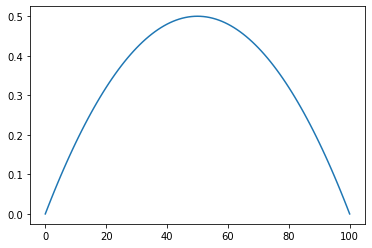

In [53]:
vals=np.arange(0,101)/100
g=[]
for v in vals:
    g.append(gini(v))
plt.plot(g)

In [54]:
df[(df.gender=="Male") & (df.Partner=="Yes") & (df.Churn=="Yes")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,sex,ten_chr
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,Male,4669.45
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes,Male,30.20
104,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes,Male,7480.00
110,0486-HECZI,Male,0,Yes,No,55,Yes,Yes,Fiber optic,Yes,...,Yes,No,Month-to-month,Yes,Electronic check,96.75,5238.90,Yes,Male,5321.25
168,3445-HXXGF,Male,1,Yes,No,58,No,No phone service,DSL,No,...,No,Yes,Month-to-month,Yes,Electronic check,45.30,2651.20,Yes,Male,2627.40
191,2472-OVKUP,Male,0,Yes,No,6,Yes,No,Fiber optic,No,...,No,Yes,Month-to-month,Yes,Electronic check,91.00,531.00,Yes,Male,546.00
223,0742-MOABM,Male,0,Yes,No,4,Yes,No,DSL,No,...,No,No,Month-to-month,No,Mailed check,50.05,179.35,Yes,Male,200.20
252,9514-JDSKI,Male,1,Yes,No,1,No,No phone service,DSL,No,...,Yes,No,Month-to-month,No,Electronic check,40.20,40.20,Yes,Male,40.20
275,6432-TWQLB,Male,0,Yes,No,5,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,85.40,401.10,Yes,Male,427.00
284,9512-UIBFX,Male,0,Yes,Yes,18,Yes,No,Fiber optic,No,...,Yes,Yes,Month-to-month,No,Mailed check,95.15,1779.95,Yes,Male,1712.70


In [55]:
df[(df.gender=="Male") & (df.Partner=="No") & (df.Churn=="Yes")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,sex,ten_chr
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,107.70
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Male,5081.30
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,Male,39.65
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,Male,20.15
36,6047-YHPVI,Male,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,69.70,316.90,Yes,Male,348.50
38,5380-WJKOV,Male,0,No,No,34,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,106.35,3549.25,Yes,Male,3615.90
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes,Male,1718.10
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes,Male,105.25
122,0404-SWRVG,Male,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,74.40,229.55,Yes,Male,223.20
133,3091-FYHKI,Male,0,No,No,1,No,No phone service,DSL,No,...,No,Yes,Month-to-month,Yes,Electronic check,35.45,35.45,Yes,Male,35.45


In [56]:
df[(df.gender=="Female") & (df.Partner=="Yes") & (df.Churn=="Yes")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,sex,ten_chr
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Female,2934.40
18,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,Female,552.00
53,7495-OOKFY,Female,1,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.30,Yes,Female,645.20
82,9191-MYQKX,Female,0,Yes,No,7,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Bank transfer (automatic),75.15,496.90,Yes,Female,526.05
99,4598-XLKNJ,Female,1,Yes,No,25,Yes,No,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.50,2514.50,Yes,Female,2462.50
113,4846-WHAFZ,Female,1,Yes,No,37,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,76.50,2868.15,Yes,Female,2830.50
117,5299-RULOA,Female,0,Yes,Yes,10,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,100.25,1064.65,Yes,Female,1002.50
131,6207-WIOLX,Female,0,Yes,Yes,25,No,No phone service,DSL,Yes,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),58.60,1502.65,Yes,Female,1465.00
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes,Female,70.45
161,0867-MKZVY,Female,0,Yes,No,20,Yes,Yes,Fiber optic,Yes,...,No,No,Month-to-month,No,Electronic check,82.40,1592.35,Yes,Female,1648.00


In [57]:
entropy(1381/len(y_train))

0.8289325536871262

In [58]:
print(export_graphviz.__doc__)

Export a decision tree in DOT format.

    This function generates a GraphViz representation of the decision tree,
    which is then written into `out_file`. Once exported, graphical renderings
    can be generated using, for example::

        $ dot -Tps tree.dot -o tree.ps      (PostScript format)
        $ dot -Tpng tree.dot -o tree.png    (PNG format)

    The sample counts that are shown are weighted with any sample_weights that
    might be present.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    decision_tree : decision tree classifier
        The decision tree to be exported to GraphViz.

    out_file : file object or string, optional (default=None)
        Handle or name of the output file. If ``None``, the result is
        returned as a string.

        .. versionchanged:: 0.20
            Default of out_file changed from "tree.dot" to None.

    max_depth : int, optional (default=None)
        The maximum depth of the representation. If No

# RandomForest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc=RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=9,\
                           min_samples_split=2,min_samples_leaf=11,\
                           random_state=22)
rfc.fit(X_train,y_train)
print("training accuracy",rfc.score(X_train,y_train))
print("testing accuracy",rfc.score(X_test,y_test))

training accuracy 0.8252555850056796
testing accuracy 0.7859170925610448


In [61]:
rfc.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=895331189, splitter='best')

In [62]:
# generate plot
#!pip install pygraphviz pydotplus
#add graphviz bin folder to path variable and restart system
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(rfc.estimators_[0],feature_names=X.columns, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
# generate plot
#!pip install pygraphviz pydotplus
#add graphviz bin folder to path variable and restart system
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(rfc.estimators_[1],feature_names=X.columns, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [63]:
print(classification_report(y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1273
           1       0.67      0.46      0.54       488

    accuracy                           0.79      1761
   macro avg       0.74      0.68      0.70      1761
weighted avg       0.77      0.79      0.77      1761



In [64]:
highest=0
for depth in range(3,15):
    for ss in range(2,20):
        for msl in range(2,12):
            rfc=RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=depth,\
                           min_samples_split=ss,min_samples_leaf=msl,\
                           random_state=22,n_jobs=-1)
            rfc.fit(X_train,y_train)
            if rfc.score(X_test,y_test)>highest:
                highest=rfc.score(X_test,y_test)
                print(depth,ss,msl)
                print("training accuracy",rfc.score(X_train,y_train))
                print("testing accuracy",rfc.score(X_test,y_test))


3 2 2
training accuracy 0.7934494509655433
testing accuracy 0.7654741624077229
4 2 2
training accuracy 0.8042408178720182
testing accuracy 0.7734241908006815
5 2 2
training accuracy 0.8078379401741764
testing accuracy 0.7756956274843839
5 2 7
training accuracy 0.8072699734948883
testing accuracy 0.7762634866553095
6 2 2
training accuracy 0.8131389625141991
testing accuracy 0.7836456558773425
6 2 3
training accuracy 0.8135176069670579
testing accuracy 0.7842135150482681
6 7 2
training accuracy 0.8146535403256342
testing accuracy 0.7859170925610448
6 8 2
training accuracy 0.8138962514199167
testing accuracy 0.7864849517319704
8 2 6
training accuracy 0.8252555850056796
testing accuracy 0.7876206700738216
8 2 11
training accuracy 0.8220371071563801
testing accuracy 0.7898921067575241


KeyboardInterrupt: 

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,make_scorer

In [66]:
scoring=make_scorer(recall_score,greater_is_better=True)

In [67]:
parameters={'n_estimators':[100,200],'max_depth':np.arange(4,12),\
           'min_samples_leaf':np.arange(2,8)}

In [68]:
model=RandomForestClassifier(criterion='gini',random_state=22)

In [69]:
gs=GridSearchCV(model,param_grid=parameters,scoring=scoring,n_jobs=-1,\
               verbose=1,cv=4)
gs.fit(X_train,y_train)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:  2.5min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=22,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

In [70]:
print(gs.best_score_)
print(gs.best_estimator_)

0.5075898276630082
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)


In [71]:
#final model
rfc=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=22, verbose=0,
                       warm_start=False)
rfc.fit(X_train,y_train)
print("accuracy",rfc.score(X_train,y_train))

print("accuracy",rfc.score(X_test,y_test))


accuracy 0.8517606967057932
accuracy 0.7859170925610448
